In [1]:
from analyzers import codebase_analyzer



Setting up clang library...
Checking /usr/lib/llvm-18/lib...
Found libclang.so in /usr/lib/llvm-18/lib
Successfully initialized clang


Found 0 source files to analyze
Found 0 source files to analyze
Analysis complete: 0 functions, 0 dependencies


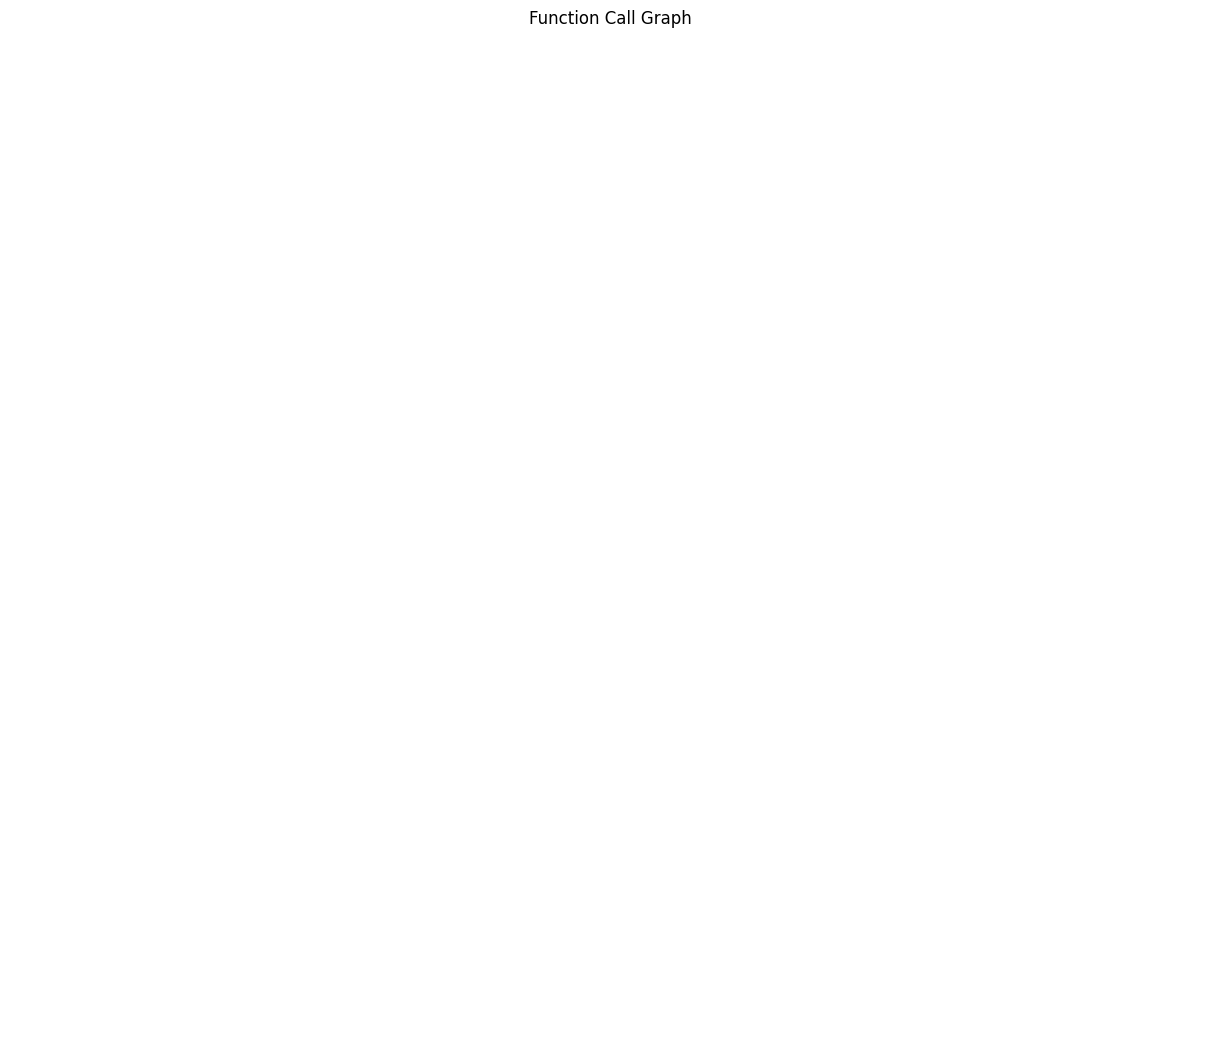

In [2]:
import networkx as nx

# Analyze the repository
repo_path = "tmp/adiprerepa/cs598-HW2"
analyzer = codebase_analyzer.CodebaseAnalyzer()
function_graph = analyzer.analyze_codebase(repo_path)

# Print the function call graph
for caller, callees in function_graph.edges.items():
    print(f"{caller} calls: {', '.join(callees)}")

# Plot the function call graph
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges from the function graph
for caller, callees in function_graph.edges.items():
    if not G.has_node(caller):
        G.add_node(caller)
    for callee in callees:
        if not G.has_node(callee):
            G.add_node(callee)
        G.add_edge(caller, callee)

# Plot the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=2000, arrowsize=20, font_size=8,
        font_weight='bold', edge_color='gray')
plt.title("Function Call Graph")
plt.show()